In [50]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [51]:
directory = "drive/MyDrive/imageprocessing/tiyatro-metni-duzenleme/images"

# En dıştaki siyah çerçeveyi silme

In [52]:
INPUT_DIR = "drive/MyDrive/imageprocessing/tiyatro-metni-duzenleme/images"
OUTPUT_DIR_BLACK = "without_black_frame"
os.makedirs(OUTPUT_DIR_BLACK, exist_ok=True)

for filename in sorted(os.listdir(INPUT_DIR)):
    path_in = os.path.join(INPUT_DIR, filename)
    path_out = os.path.join(OUTPUT_DIR_BLACK, filename)

    img = cv2.imread(path_in, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    # OTSU Threshold
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Morphological Opening (Siyah Çerçeve)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,25))
    opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

    result = img.copy()
    result[opened > 0] = 255

    cv2.imwrite(path_out, result)

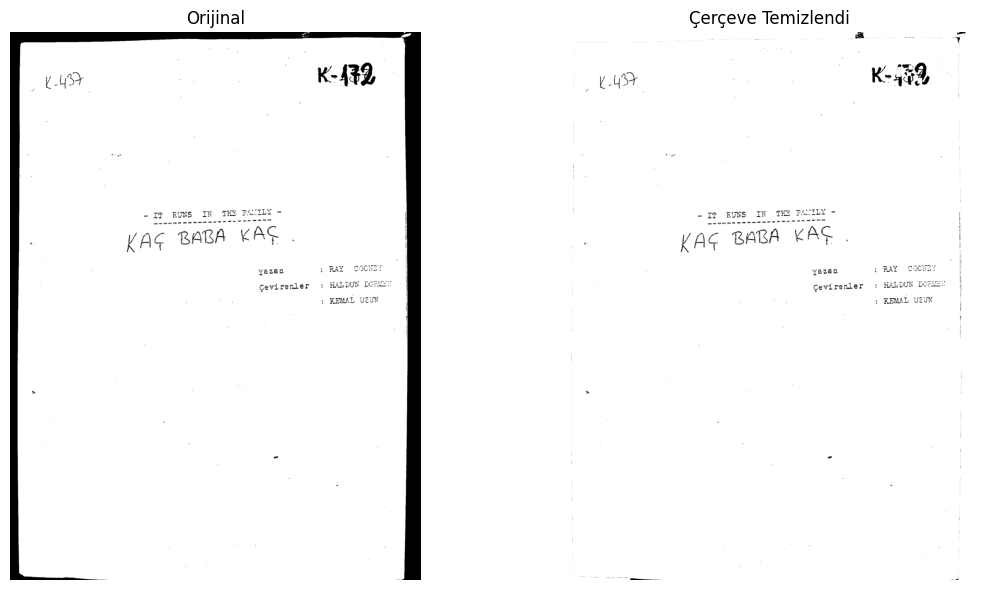

In [53]:
sample_file = sorted(os.listdir(INPUT_DIR))[0]
img_original = cv2.imread(os.path.join(INPUT_DIR, sample_file), cv2.IMREAD_GRAYSCALE)
img_no_black = cv2.imread(os.path.join(OUTPUT_DIR_BLACK, sample_file), cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Orijinal")
plt.imshow(img_original, cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Çerçeve Temizlendi")
plt.imshow(img_no_black, cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()


# Dikey çizgileri silme

In [54]:
INPUT_DIR = "without_black_frame"
OUTPUT_DIR_VERT = "without_vertical_lines"

os.makedirs(OUTPUT_DIR_VERT, exist_ok=True)

sharpen_kernel = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])

for filename in sorted(os.listdir(INPUT_DIR)):
    path_in = os.path.join(INPUT_DIR, filename)
    path_out = os.path.join(OUTPUT_DIR_VERT, filename)

    img = cv2.imread(path_in, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue


    # Binary threshold
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Morphology open
    kernel_vert = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 50))
    detected_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_vert)

    # Dilation
    dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    detected_lines = cv2.dilate(detected_lines, dilate_kernel, iterations=1)

    # çizgi varsa beyaz yap
    result = img.copy()
    result[detected_lines > 0] = 255

    # CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast = clahe.apply(result)

    final = cv2.filter2D(contrast, -1, sharpen_kernel)

    cv2.imwrite(path_out, final)

print(f"Dosyalar '{OUTPUT_DIR_VERT}' klasörüne kaydedildi.")

Dosyalar 'without_vertical_lines' klasörüne kaydedildi.


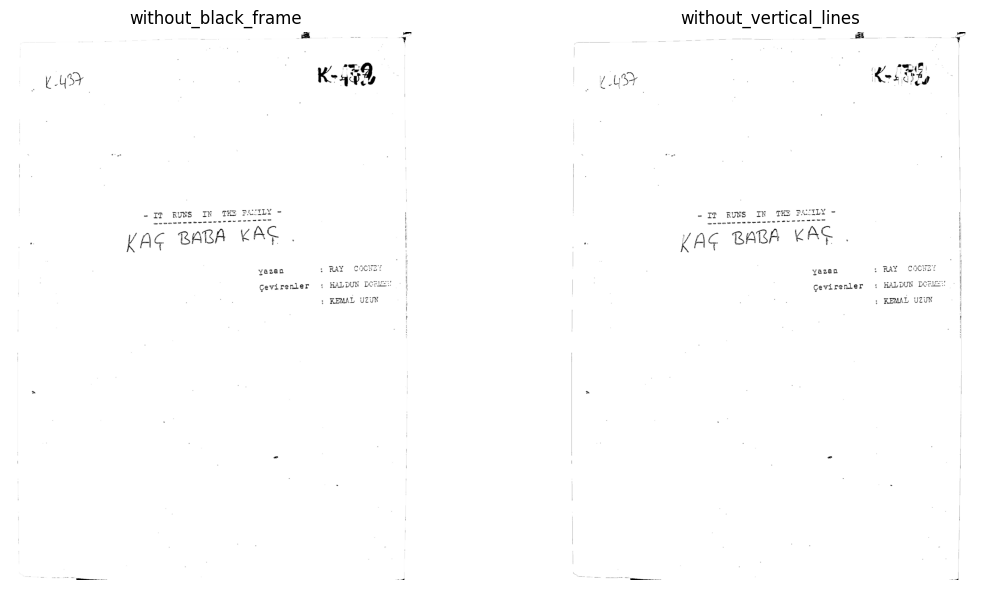

In [55]:
sample_file = sorted(os.listdir(INPUT_DIR))[0]
img_no_black = cv2.imread(os.path.join(INPUT_DIR, sample_file), cv2.IMREAD_GRAYSCALE)
img_no_vert = cv2.imread(os.path.join(OUTPUT_DIR_VERT, sample_file), cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("without_black_frame")
plt.imshow(img_no_black, cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("without_vertical_lines")
plt.imshow(img_no_vert, cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()

# Salt and pepper tarzı siyah noktaları silme

In [57]:
INPUT_DIR = "without_vertical_lines"
OUTPUT_DIR_DOTS = "without_dots"
os.makedirs(OUTPUT_DIR_DOTS, exist_ok=True)

MIN_NOISE_AREA = 10

for filename in sorted(os.listdir(INPUT_DIR)):
    path_in = os.path.join(INPUT_DIR, filename)
    path_out = os.path.join(OUTPUT_DIR_DOTS, filename)

    img = cv2.imread(path_in, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    # Binary Threshold
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)

    sizes = stats[1:, cv2.CC_STAT_AREA]


    small_component_indices = np.where(sizes < MIN_NOISE_AREA)[0] + 1


    noise_mask = np.isin(labels, small_component_indices)

    cleaned_img = img.copy()
    cleaned_img[noise_mask] = 255


    cv2.imwrite(path_out, cleaned_img)


print(f"'{OUTPUT_DIR_DOTS}' klasörüne kaydedildi.")

'without_dots' klasörüne kaydedildi.


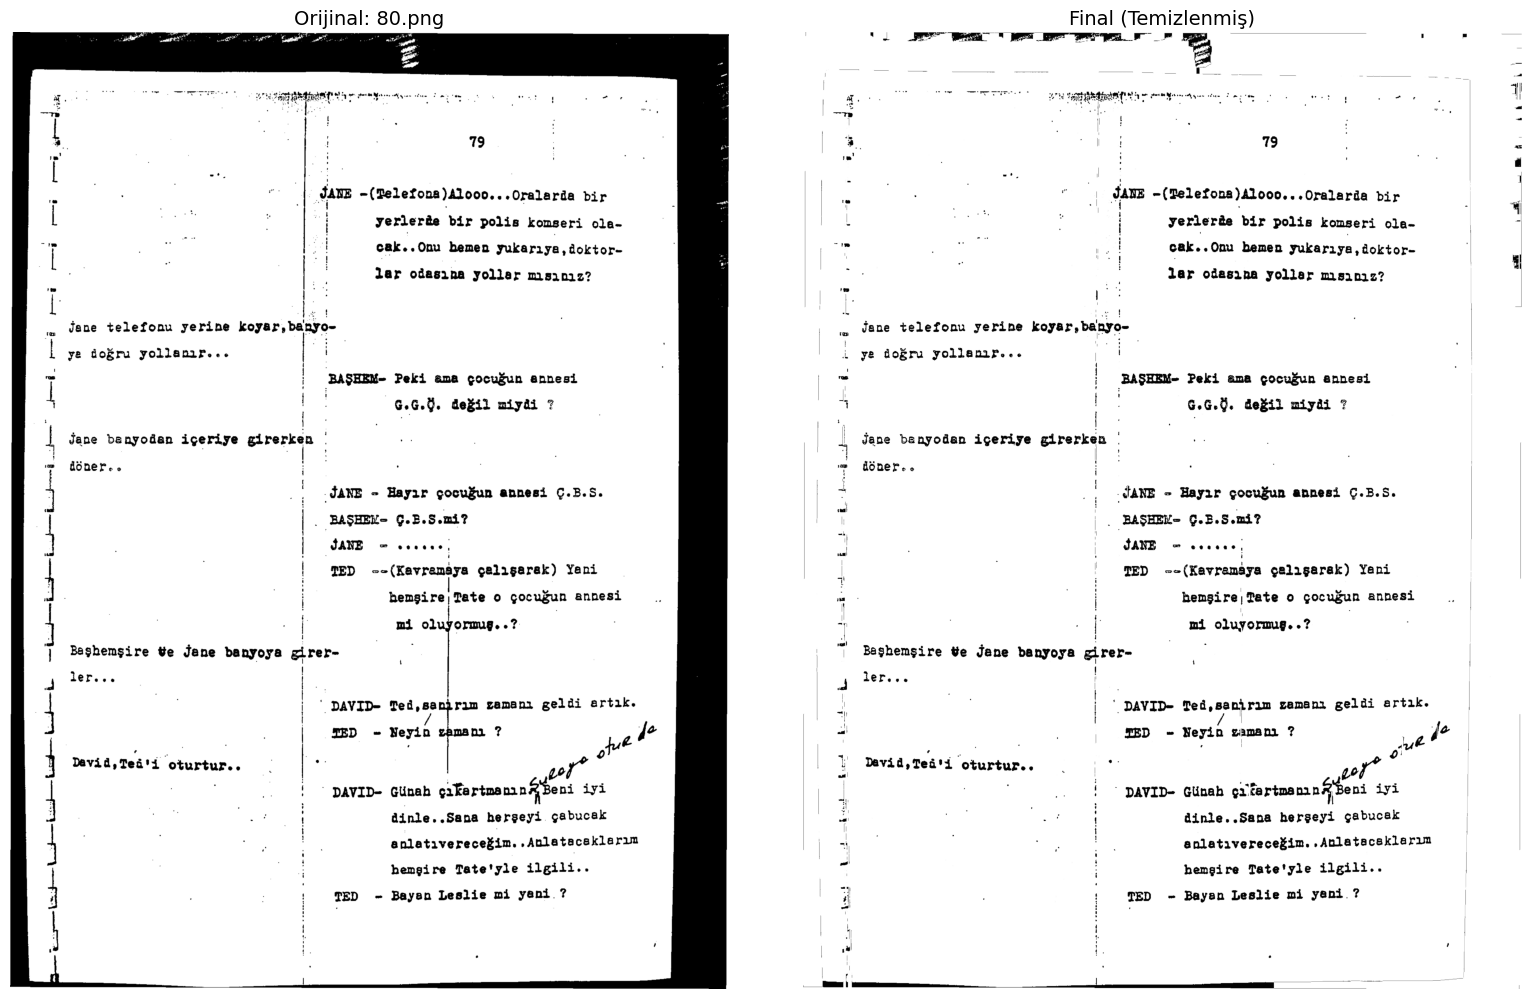

In [59]:
ORIGINAL_DIR = "drive/MyDrive/imageprocessing/tiyatro-metni-duzenleme/images"
FINAL_DIR = "without_dots"

target_filename = "80.png"

path_orig = os.path.join(ORIGINAL_DIR, target_filename)
path_final = os.path.join(FINAL_DIR, target_filename)

img_orig = cv2.imread(path_orig, cv2.IMREAD_GRAYSCALE)
img_final = cv2.imread(path_final, cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plt.title(f"Orijinal: {target_filename}", fontsize=14)
plt.imshow(img_orig, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Final (Temizlenmiş)", fontsize=14)
plt.imshow(img_final, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()